1. Started with energy_LCL data set which contains Day,LCLid and respective daily energy consumption
2. Started creating features \
    A) Weekly Avg Consumption of Each House
    
    B) Monthly Avg COnsumption of Each House
    
    C) Diffrence in each Week Energy COnsumption for each house
    
    D) Diffrence in each month Energy COnsumption for each house

In [44]:
import data_process
import pandas as pd
from pathlib import Path
import os
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from numpy.random import seed
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd    # version 0.23.4 , because of some bugs in the latest version 0.24
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from math import sqrt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA

In [45]:
df = pd.read_csv('energy_LCL.csv')

In [46]:
df.head()

day      LCLid  energy
0  2012-10-12  MAC000002   7.098
1  2012-10-13  MAC000002  11.087
2  2012-10-14  MAC000002  13.223
3  2012-10-15  MAC000002  10.257
4  2012-10-16  MAC000002   9.769

In [47]:
df = df.pivot_table(index=['day'], columns='LCLid',
                 values='energy', aggfunc='first').reset_index()

In [48]:
df.fillna(0,inplace=True)

In [49]:
df1=df.copy()

In [50]:
df["day"] = pd.to_datetime(df["day"], format='%Y-%m-%d')

In [51]:
df

LCLid        day  MAC000002  MAC000003  MAC000004  MAC000005  MAC000006  \
0     2011-11-23      0.000      0.000      0.000      0.000      0.000   
1     2011-11-24      0.000      0.000      0.000      0.000      0.000   
2     2011-11-25      0.000      0.000      0.000      0.000      0.000   
3     2011-11-26      0.000      0.000      0.000      0.000      0.000   
4     2011-11-27      0.000      0.000      0.000      0.000      0.000   
..           ...        ...        ...        ...        ...        ...   
824   2014-02-24     12.528      9.069      1.696      4.448      3.556   
825   2014-02-25     11.826      9.686      1.751      4.865      3.093   
826   2014-02-26     12.328      9.072      1.807      3.908      2.871   
827   2014-02-27     20.518     11.511      1.588      4.638      2.901   
828   2014-02-28      2.774      0.140      0.162      0.224      0.056   

LCLid  MAC000007  MAC000008  MAC000009  MAC000010  ...  MAC005554  MAC005555  \
0          0.000        0.0      0.000      0.000  ...      0.000      0.000   
1          0.000        0.0      0.000      0.000  ...      0.000      0.000   
2          0.000        0.0      0.000      0.000  ...      0.000      0.000   
3          0.000        0.0      0.000      0.000  ...      0.000      0.000   
4          0.000        0.0      0.000      0.000  ...      0.000      0.000   
..           ...        ...        ...        ...  ...        ...        ...   
824       10.333        0.0     10.014     24.592  ...     10.470     10.290   
825        9.645        0.0      9.137     28.281  ...     11.069      6.525   
826        7.402        0.0      8.048     25.162  ...      0.082      5.053   
827        9.155        0.0      9.197     21.725  ...      0.000      5.172   
828        0.120        0.0      0.100      0.552  ...      0.000      0.172   

LCLid  MAC005557  MAC005558  MAC005561  MAC005562  MAC005564  MAC005565  \
0          0.000       0.00      0.000      0.000      0.000        0.0   
1          0.000       0.00      0.000      0.000      0.000        0.0   
2          0.000       0.00      0.000      0.000      0.000        0.0   
3          0.000       0.00      0.000      0.000      0.000        0.0   
4          0.000       0.00      0.000      0.000      0.000        0.0   
..           ...        ...        ...        ...        ...        ...   
824        6.394       0.00      7.637     14.588      4.847        0.0   
825        6.034       0.00     10.907     11.032      3.865        0.0   
826        6.688       0.00      7.931     11.057      3.431        0.0   
827        6.382       0.79      9.532      9.480      4.235        0.0   
828        0.220       0.00      0.184      0.258      0.122        0.0   

LCLid  MAC005566  MAC005567  
0          0.000      0.000  
1          0.000      0.000  
2          0.000      0.000  
3          0.000      0.000  
4          0.000      0.000  
..           ...        ...  
824        4.829      4.107  
825        4.857      5.762  
826        4.898      5.066  
827        6.257      3.217  
828        0.310      0.366  

[829 rows x 5562 columns]

In [52]:
from tqdm import tqdm
df = df.set_index("day")
df_daily_consumption = pd.DataFrame()
df_weekly_consumption = pd.DataFrame()
df_monthly_consumption = pd.DataFrame()
for i in df:
    df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
    df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
    df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usu

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weekly_consumption["weekly_total_consumption_" + str(i)] = df[i].resample("W").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly_consumption["Monthly_total_consumption_" + str(i)] = df[i].resample("M").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_consumption["daily_total_consumption_" + str(i)] = df[i].resample("D").sum()
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\1199874044.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is u

In [53]:
df_daily_consumption

daily_total_consumption_MAC000002  \
day                                             
2011-11-23                              0.000   
2011-11-24                              0.000   
2011-11-25                              0.000   
2011-11-26                              0.000   
2011-11-27                              0.000   
...                                       ...   
2014-02-24                             12.528   
2014-02-25                             11.826   
2014-02-26                             12.328   
2014-02-27                             20.518   
2014-02-28                              2.774   

            daily_total_consumption_MAC000003  \
day                                             
2011-11-23                              0.000   
2011-11-24                              0.000   
2011-11-25                              0.000   
2011-11-26                              0.000   
2011-11-27                              0.000   
...                                       ...   
2014-02-24                              9.069   
2014-02-25                              9.686   
2014-02-26                              9.072   
2014-02-27                             11.511   
2014-02-28                              0.140   

            daily_total_consumption_MAC000004  \
day                                             
2011-11-23                              0.000   
2011-11-24                              0.000   
2011-11-25                              0.000   
2011-11-26                              0.000   
2011-11-27                              0.000   
...                                       ...   
2014-02-24                              1.696   
2014-02-25                              1.751   
2014-02-26                              1.807   
2014-02-27                              1.588   
2014-02-28                              0.162   

            daily_total_consumption_MAC000005  \
day                                             
2011-11-23                              0.000   
2011-11-24                              0.000   
2011-11-25                              0.000   
2011-11-26                              0.000   
2011-11-27                              0.000   
...                                       ...   
2014-02-24                              4.448   
2014-02-25                              4.865   
2014-02-26                              3.908   
2014-02-27                              4.638   
2014-02-28                              0.224   

            daily_total_consumption_MAC000006  \
day                                             
2011-11-23                              0.000   
2011-11-24                              0.000   
2011-11-25                              0.000   
2011-11-26                              0.000   
2011-11-27                              0.000   
...                                       ...   
2014-02-24                              3.556   
2014-02-25                              3.093   
2014-02-26                              2.871   
2014-02-27                              2.901   
2014-02-28                              0.056   

            daily_total_consumption_MAC000007  \
day                                             
2011-11-23                              0.000   
2011-11-24                              0.000   
2011-11-25                              0.000   
2011-11-26                              0.000   
2011-11-27                              0.000   
...                                       ...   
2014-02-24                             10.333   
2014-02-25                              9.645   
2014-02-26                              7.402   
2014-02-27                              9.155   
2014-02-28                              0.120   

            daily_total_consumption_MAC000008  \
day                                             
2011-11-23                                0.0   
2011-11-24                           

In [54]:
Main_df = pd.DataFrame()
Main_df["Household_Name"] = df.columns
for idx in df_daily_consumption.index:
    Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])

for idx in df_weekly_consumption.index:
    Main_df["Weekly_Consumption_" + str(idx)] = list(df_weekly_consumption.loc[idx])

for idx in df_monthly_consumption.index:
    Main_df["Monthly_Consumption_" + str(idx)] = list(df_monthly_consumption.loc[idx])

for i in range(1, len(Main_df.columns)):
    for j in range(i + 1, len(Main_df.columns)):
        Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
            j]] - Main_df[Main_df.columns[i]]
        break

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Daily_Consumption_" + str(idx)] = list(df_daily_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Weekly_Consumption_" + str(idx)] = list(df_weekly_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Weekly_Consumption_" + str(idx)] = list(df_weekly_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Weekly_Consumption_" + str(idx)] = list(df_weekly_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Weekly_Consumption_" + str(idx)] = list(df_weekly_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Monthly_Consumption_" + str(idx)] = list(df_monthly_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["Monthly_Consumption_" + str(idx)] = list(df_monthly_consumption.loc[idx])
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarnin

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarnin

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarnin

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarnin

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarnin

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarnin

C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Main_df["diff_bet_" + str(Main_df.columns[i] + "_nd_" + str(Main_df.columns[j]))] = Main_df[Main_df.columns[
C:\Users\avitr\AppData\Local\Temp\ipykernel_112300\3892872848.py:14: PerformanceWarnin

In [55]:
Main_df

Household_Name  Daily_Consumption_2011-11-23 00:00:00  \
0         MAC000002                                    0.0   
1         MAC000003                                    0.0   
2         MAC000004                                    0.0   
3         MAC000005                                    0.0   
4         MAC000006                                    0.0   
...             ...                                    ...   
5556      MAC005562                                    0.0   
5557      MAC005564                                    0.0   
5558      MAC005565                                    0.0   
5559      MAC005566                                    0.0   
5560      MAC005567                                    0.0   

      Daily_Consumption_2011-11-24 00:00:00  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
5556                                    0.0   
5557                                    0.0   
5558                                    0.0   
5559                                    0.0   
5560                                    0.0   

      Daily_Consumption_2011-11-25 00:00:00  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
5556                                    0.0   
5557                                    0.0   
5558                                    0.0   
5559                                    0.0   
5560                                    0.0   

      Daily_Consumption_2011-11-26 00:00:00  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
5556                                    0.0   
5557                                    0.0   
5558                                    0.0   
5559                                    0.0   
5560                                    0.0   

      Daily_Consumption_2011-11-27 00:00:00  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
5556                                    0.0   
5557                                    0.0   
5558                                    0.0   
5559                                    0.0   
5560                                    0.0   

      Daily_Consumption_2011-11-28 00:00:00  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
5556                                    0.0   
5557                                    0.0   
5558                                    0.0   
5559                                    0.0   
5560                                    0.0   

      Daily_Consumption_2011-11-29 00:00:00  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
5556                                    0.0   
5557                                    0.0   
5558        

In [57]:
def data_preprocessing(df1,data_choice):
    df1 = df1.set_index("Household_Name")
    df1 = pd.get_dummies(df1, prefix_sep='_', drop_first=True)
    df1.fillna(df1.mean(), inplace=True)
    cols = df1.columns
    scaler = MinMaxScaler()
    df1 = scaler.fit_transform(df1)
    df1 = pd.DataFrame(df1, columns=cols)
    return df1 

def dimension_reduction(df):
    data = TSNE(n_components=3, perplexity=40).fit_transform(df)
    print(data.shape)
    return data
    return df1


data_choice="london_data"
processed_df = data_preprocessing(Main_df, data_choice)
df_reduced_dimension = dimension_reduction(processed_df)

C:\Users\avitr\Anaconda3\envs\myenvpredict\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\avitr\Anaconda3\envs\myenvpredict\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(5561, 3)


In [58]:
Main_df.columns.to_list()

['Household_Name',
 'Daily_Consumption_2011-11-23 00:00:00',
 'Daily_Consumption_2011-11-24 00:00:00',
 'Daily_Consumption_2011-11-25 00:00:00',
 'Daily_Consumption_2011-11-26 00:00:00',
 'Daily_Consumption_2011-11-27 00:00:00',
 'Daily_Consumption_2011-11-28 00:00:00',
 'Daily_Consumption_2011-11-29 00:00:00',
 'Daily_Consumption_2011-11-30 00:00:00',
 'Daily_Consumption_2011-12-01 00:00:00',
 'Daily_Consumption_2011-12-02 00:00:00',
 'Daily_Consumption_2011-12-03 00:00:00',
 'Daily_Consumption_2011-12-04 00:00:00',
 'Daily_Consumption_2011-12-05 00:00:00',
 'Daily_Consumption_2011-12-06 00:00:00',
 'Daily_Consumption_2011-12-07 00:00:00',
 'Daily_Consumption_2011-12-08 00:00:00',
 'Daily_Consumption_2011-12-09 00:00:00',
 'Daily_Consumption_2011-12-10 00:00:00',
 'Daily_Consumption_2011-12-11 00:00:00',
 'Daily_Consumption_2011-12-12 00:00:00',
 'Daily_Consumption_2011-12-13 00:00:00',
 'Daily_Consumption_2011-12-14 00:00:00',
 'Daily_Consumption_2011-12-15 00:00:00',
 'Daily_Consump

In [59]:
def clustering_kmeans(df1, n_cluster):
    n_clusters = n_cluster
    kmeans = KMeans(n_clusters, init='k-means++', n_init=10, max_iter=500, algorithm='auto', verbose=0)

    kmeans.fit(df1)
    labels = kmeans.labels_


    return labels



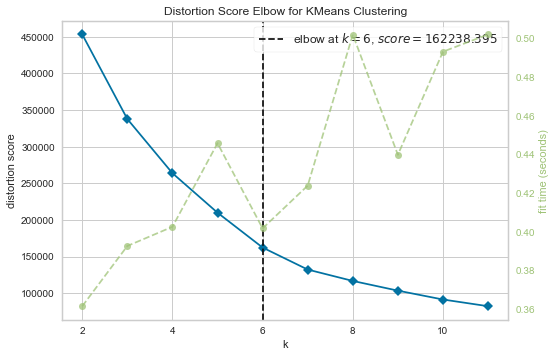

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(df_reduced_dimension)        # Fit the data to the visualizer
visualizer.show() 

In [63]:
#Create kmeans clustering

n_clusters = 6
labels = clustering_kmeans(df_reduced_dimension, n_clusters) 
choice= "kmeans"
print(labels)

C:\Users\avitr\Anaconda3\envs\myenvpredict\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[4 0 1 ... 1 4 4]


In [64]:
def cluster_dictionary(df1, labels):
    df1 = df1.set_index("day")
    labels = labels.tolist()
    dict = {}

    for j in range(len(set(labels))):  # use set() to remove duplicates of list

        lis = []
        for i in range(len(labels)):
            # print("i", labels[i])
            if labels[i] == j:

                lis.append(df1.columns[i])
            else:
                pass
        dict[str(j)] = lis  # dictionary of clusters, key= label no and value = list of clusters
    print(dict)
    return dict

Main_df, Main_df2= Main_df[:1000], Main_df[1001:]
dict_cluster = cluster_dictionary(df1, labels)

{'0': ['MAC000003', 'MAC000015', 'MAC000017', 'MAC000018', 'MAC000019', 'MAC000020', 'MAC000021', 'MAC000022', 'MAC000023', 'MAC000024', 'MAC000025', 'MAC000026', 'MAC000027', 'MAC000028', 'MAC000029', 'MAC000030', 'MAC000031', 'MAC000032', 'MAC000033', 'MAC000034', 'MAC000035', 'MAC000036', 'MAC000038', 'MAC000039', 'MAC000040', 'MAC000041', 'MAC000042', 'MAC000043', 'MAC000044', 'MAC000045', 'MAC000046', 'MAC000047', 'MAC000048', 'MAC000049', 'MAC000050', 'MAC000051', 'MAC000052', 'MAC000053', 'MAC000054', 'MAC000055', 'MAC000056', 'MAC000057', 'MAC000058', 'MAC000059', 'MAC000060', 'MAC000061', 'MAC000062', 'MAC000063', 'MAC000064', 'MAC000065', 'MAC000066', 'MAC000067', 'MAC000068', 'MAC000069', 'MAC000070', 'MAC000071', 'MAC000072', 'MAC000073', 'MAC000074', 'MAC000075', 'MAC000076', 'MAC000077', 'MAC000078', 'MAC000079', 'MAC000080', 'MAC000081', 'MAC000082', 'MAC000083', 'MAC000084', 'MAC000085', 'MAC000086', 'MAC000087', 'MAC000088', 'MAC000089', 'MAC000090', 'MAC000091', 'MAC0

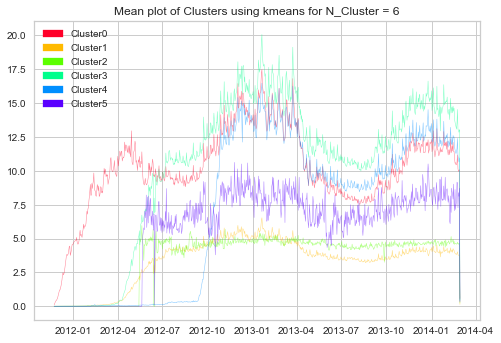

In [65]:
def mean_cluster_visualisation(dict, df1,choice,n_clusters):

    df1["day"] = pd.to_datetime(df1["day"], format='%Y-%m-%d')
    df1 = df1.set_index("day")
    NUM_COLORS= n_clusters
    df_mean = pd.DataFrame()
    fig, ax = plt.subplots()
    cm = plt.get_cmap('gist_rainbow')
    color = [cm(1. * i / NUM_COLORS) for i in range(NUM_COLORS)]

    for i in dict.keys():
        color_map_mean = {0: 'm',
                     1: 'c',
                     2: 'g',
                     3: 'b',
                     4: 'y',
                     5: 'k',
                     6: 'r'
                     }

        patchList = []
        df= pd.DataFrame()
        df["mean"]= df1[dict[str(i)]].mean(axis=1)
        
        df_mean["cluster"+str(i)]= df["mean"]
        df_mean = df_mean[:-1]

       
        plt.plot(df["mean"], c= color[int(i)], linewidth=0.5, alpha= 0.5 )

        for key in dict.keys():
            data_key = mpatches.Patch(color=(color[int(key)]), label="Cluster"+str(key))

            patchList.append(data_key)
        plt.legend(handles=patchList)
        plt.title('Mean plot of Clusters using ' + str(choice) + ' for N_Cluster = ' + str(n_clusters))
        
    
    plt.rcParams["figure.figsize"] = (20,15)
    plt.show()
    df_mean.to_csv("dfmean.csv")

    return df_mean

df_mean = mean_cluster_visualisation(dict_cluster, df1, choice, n_clusters)

In [66]:
df_mean

cluster0  cluster1  cluster2   cluster3   cluster4  cluster5
day                                                                      
2011-11-23   0.081575  0.000000     0.000   0.000000   0.000000     0.000
2011-11-24   0.189998  0.001025     0.000   0.000588   0.000000     0.000
2011-11-25   0.270923  0.001884     0.000   0.000300   0.000000     0.000
2011-11-26   0.378259  0.000775     0.000   0.000277   0.000000     0.000
2011-11-27   0.398177  0.001359     0.000   0.000710   0.000000     0.000
...               ...       ...       ...        ...        ...       ...
2014-02-18  10.560988  3.924322     4.626  13.593640  11.533660     8.620
2014-02-19  10.608155  3.856512     4.645  13.416643  11.359114     7.141
2014-02-20  10.442962  3.862151     4.607  13.268999  11.275649     7.500
2014-02-21  10.464897  3.819239     4.582  13.079370  11.420938     7.751
2014-02-22  10.633140  3.893982     4.620  13.506573  11.627097     9.164

[823 rows x 6 columns]

<AxesSubplot:xlabel='day'>

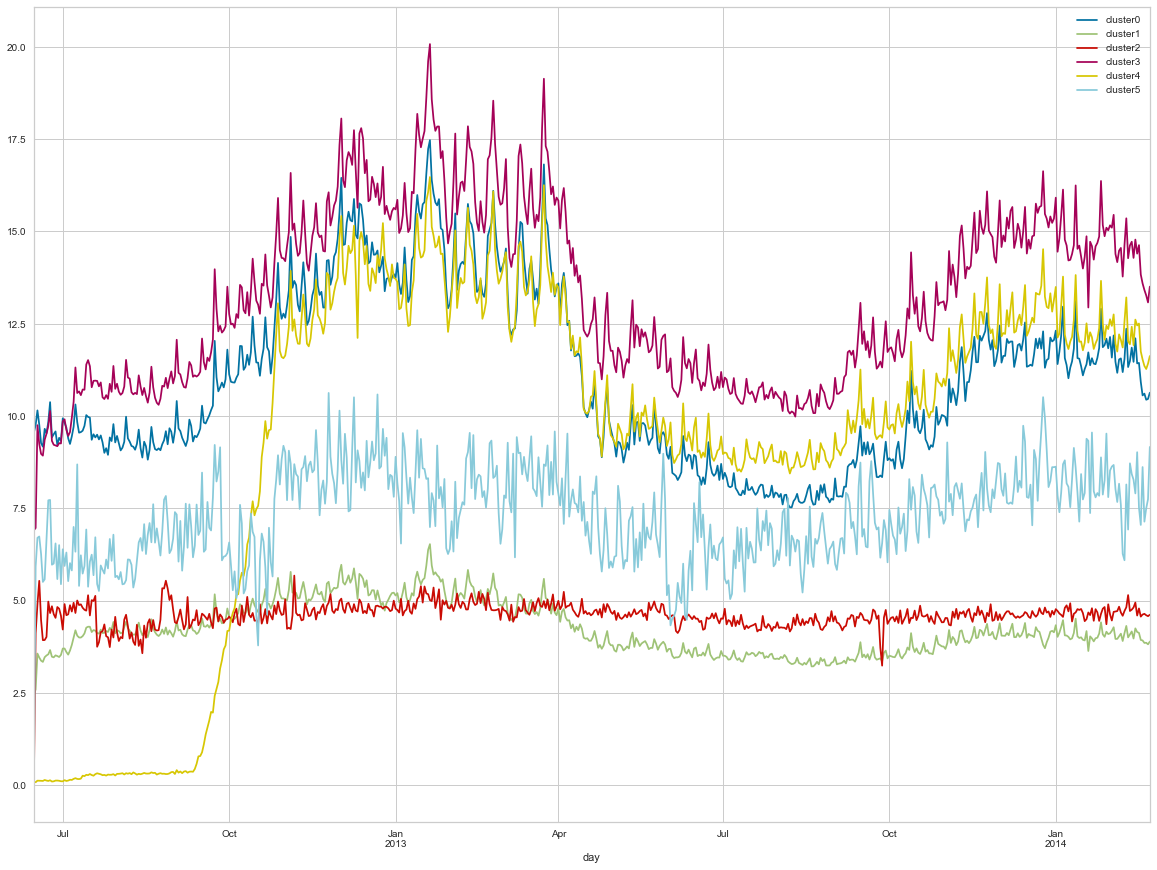

In [67]:
df_mean[205:][['cluster0','cluster1','cluster2','cluster3','cluster4','cluster5']].plot()

In [68]:
df_cluster_1 = dict_cluster['0']
df_cluster_2 = dict_cluster['1']
df_cluster_3 = dict_cluster['2']
df_cluster_4 = dict_cluster['3']

In [69]:
len(dict_cluster['0'])

1108

In [74]:
energy = pd.read_csv('energy_LCL.csv')
len(energy)

3510568

In [75]:
energy1 = energy[energy['LCLid'].isin(df_cluster_1)]
energy2 = energy[energy['LCLid'].isin(df_cluster_2)]
energy3 = energy[energy['LCLid'].isin(df_cluster_3)]
energy4 = energy[energy['LCLid'].isin(df_cluster_4)]

In [76]:
energy1.head()

day      LCLid  energy
505  2012-02-20  MAC000003   7.561
506  2012-02-21  MAC000003  32.218
507  2012-02-22  MAC000003  19.609
508  2012-02-23  MAC000003  21.694
509  2012-02-24  MAC000003  15.817

In [77]:
energy1.to_csv('energy1.csv',index=False)
energy2.to_csv('energy2.csv',index=False)
energy3.to_csv('energy3.csv',index=False)
energy4.to_csv('energy4.csv',index=False)